<a href="https://colab.research.google.com/github/petar-jr/ai-course/blob/cnn_rnn_examples/1D_shape_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np

In [97]:
original_shapes = ['112233', '443322', '555666', '888987', '339988']
shapes = np.array([list(map(int, s)) for s in original_shapes])

row_size = 40
nof_rows = 50000

In [125]:
def generate_data(number_of_rows):
    X_train = []
    y_train = []

    for i in range(nof_rows):
        row = np.random.randint(0, 2, size=row_size)
        shape_index = np.random.randint(0, len(shapes))
        shape = shapes[shape_index]
        position = np.random.randint(0, row_size - shape.size)
        row[position:position + shape.size] = shape
        X_train.append(row)
        y_train.append(shape_index)
    return np.array(X_train), np.array(y_train)

In [126]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten


In [127]:
X_train, y_train = generate_data(nof_rows)
X_test, y_test = generate_data(nof_rows/4)

print(X_train[0])
print('There hides shape', y_train[0])

[0 1 1 1 0 1 0 0 1 0 5 5 5 6 6 6 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1
 1 1 1]
There hides shape 2


In [121]:
from tensorflow.keras import backend as K

if K.image_data_format() == 'channels_first':
    train_images = X_train.reshape(X_train.shape[0], 1, 40)
    test_images = X_test.reshape(X_test.shape[0], 1, 40)
    input_shape = (1, 40)
else:
    train_images = X_train.reshape(X_train.shape[0], 40, 1)
    test_images = X_test.reshape(X_test.shape[0], 40, 1)
    input_shape = (40, 1)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 10
test_images /= 10

train_images.shape

(50000, 40, 1)

In [122]:
train_labels = tensorflow.keras.utils.to_categorical(y_train, 10)
test_labels = tensorflow.keras.utils.to_categorical(y_test, 10)

test_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [123]:
model = Sequential([
    Conv1D(32, kernel_size=(5), activation='relu', input_shape=(40,1)),
    Flatten(),
    Dense(70, activation='relu'),
    Dense(len(shapes), activation='softmax')
])

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, y_train,
                    epochs=20,
                    batch_size=100,
                    validation_data=(test_images, y_test), verbose=2)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_27 (Conv1D)          (None, 36, 32)            192       
                                                                 
 flatten_25 (Flatten)        (None, 1152)              0         
                                                                 
 dense_56 (Dense)            (None, 70)                80710     
                                                                 
 dense_57 (Dense)            (None, 5)                 355       
                                                                 
Total params: 81257 (317.41 KB)
Trainable params: 81257 (317.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
500/500 - 5s - loss: 1.3747 - accuracy: 0.3839 - val_loss: 1.2281 - val_accuracy: 0.4690 - 5s/epoch - 10ms/step
Epoch 2/20
500/500 - 3s 

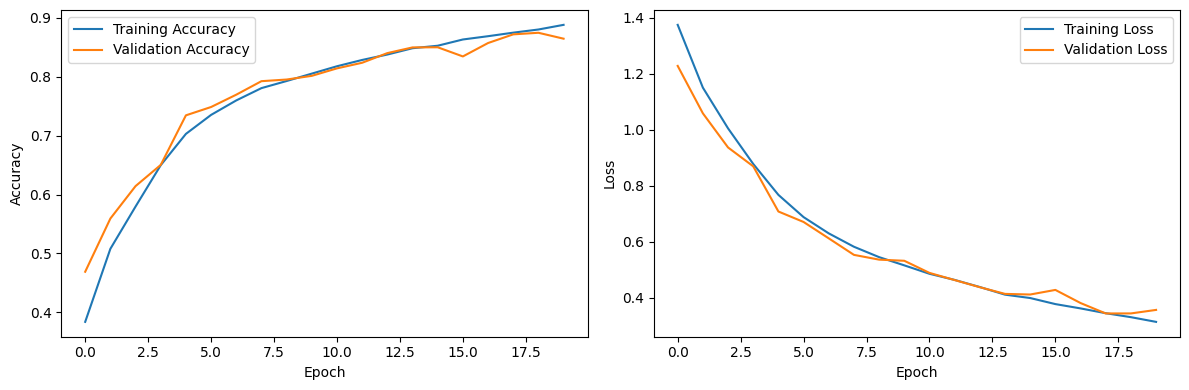

In [124]:
import matplotlib.pyplot as plt

def plot_history(history):
  plt.figure(figsize=(12, 4))

  # Plot accuracy
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  # Plot loss
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  plt.tight_layout()
  plt.show()

plot_history(history)